In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, r2_score
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout


2025-02-28 12:45:52.021146: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
stock="sorted_stock_data_cleaned_nica.csv"

In [3]:
data=pd.read_csv(stock)

In [4]:
data

,S.N,Date,Open,High,Low,Close,per_change,Qty,Turnover,EPS,PE
0,1920.0,2016-10-16,678.0,666.0,658.0,660.0,0.00,3547.0,2347771.0,17.94,36.789298
1,1919.0,2016-10-17,660.0,660.0,647.0,651.0,0.00,5758.0,3758521.0,17.94,36.287625
2,1918.0,2016-10-18,651.0,655.0,644.0,646.0,0.00,6085.0,3939778.0,17.94,36.008919
3,1917.0,2016-10-19,646.0,651.0,642.0,648.0,0.00,6977.0,4505359.0,17.94,36.120401
4,1916.0,2016-10-20,648.0,651.0,643.0,648.0,0.00,3303.0,2133809.0,17.94,36.120401
...,...,...,...,...,...,...,...,...,...,...,...
1915,5.0,2025-02-13,360.0,366.0,360.0,363.0,-0.03,47627.0,17318839.0,2.04,177.941176
1916,4.0,2025-02-16,367.0,370.9,365.0,370.7,2.12,70533.0,26014490.4,2.04,181.715686
1917,3.0,2025-02-17,371.0,386.9,370.7,382.0,3.05,108899.0,41212054.5,2.04,187.254902
1918,2.0,2025-02-18,389.0,389.6,375.0,377.0,-1.31,74518.0,28374584.9,2.04,184.803922


In [5]:
data_all=data['Close']

In [6]:
data_all

0       660.0
1       651.0
2       646.0
3       648.0
4       648.0
        ...  
1915    363.0
1916    370.7
1917    382.0
1918    377.0
1919    374.5
Name: Close, Length: 1920, dtype: float64

In [7]:
data_test=data_all

In [8]:
data_test

0       660.0
1       651.0
2       646.0
3       648.0
4       648.0
        ...  
1915    363.0
1916    370.7
1917    382.0
1918    377.0
1919    374.5
Name: Close, Length: 1920, dtype: float64

In [9]:
# import pandas as pd

# # Read CSV file
# df = pd.read_csv("NICA_Final_EPS_PE.csv")




In [10]:
# Scaling Data
scaler = MinMaxScaler(feature_range=(0,1))
# data_train_scaled = scaler.fit_transform(np.array(data_train).reshape(-1,1))
data_test_scaled = scaler.fit_transform(np.array(data_test).reshape(-1,1))

In [11]:
data_test_scaled.shape

(1920, 1)

In [12]:
x_test, y_test = [], []
for i in range(500, len(data_test_scaled)):
    x_test.append(data_test_scaled[i-500:i])
    y_test.append(data_test_scaled[i, 0])
x_test, y_test = np.array(x_test), np.array(y_test)

In [13]:
x_test, y_test

(array([[[0.46709677],
         [0.45548387],
         [0.44903226],
         ...,
         [0.13548387],
         [0.14322581],
         [0.07741935]],
 
        [[0.45548387],
         [0.44903226],
         [0.4516129 ],
         ...,
         [0.14322581],
         [0.07741935],
         [0.07612903]],
 
        [[0.44903226],
         [0.4516129 ],
         [0.4516129 ],
         ...,
         [0.07741935],
         [0.07612903],
         [0.09935484]],
 
        ...,
 
        [[0.48658065],
         [0.48258065],
         [0.47354839],
         ...,
         [0.084     ],
         [0.08387097],
         [0.09380645]],
 
        [[0.48258065],
         [0.47354839],
         [0.47380645],
         ...,
         [0.08387097],
         [0.09380645],
         [0.1083871 ]],
 
        [[0.47354839],
         [0.47380645],
         [0.48387097],
         ...,
         [0.09380645],
         [0.1083871 ],
         [0.10193548]]]),
 array([0.07612903, 0.09935484, 0.1083871 , ..., 0.1083

In [14]:
print(f"Shape of train={x_test.shape}\nShape of data_test={y_test.shape}")

Shape of train=(1420, 500, 1)
Shape of data_test=(1420,)


In [15]:
from tensorflow.keras.models import load_model

# Load the saved Keras model
model = load_model('stock_model_improved.keras')

# Now you can use the model to make predictions, evaluate, etc.


In [16]:
# Make Predictions
y_pred_scaled = model.predict(x_test)
y_pred = scaler.inverse_transform(y_pred_scaled)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1,1))

45/45 [==============================] - 10s 210ms/step


In [17]:
# Performance Metrics
print("MAE:", mean_absolute_error(y_test_actual, y_pred))
print("R² Score:", r2_score(y_test_actual, y_pred))

MAE: 23.087779489436624
R² Score: 0.9736570287518995


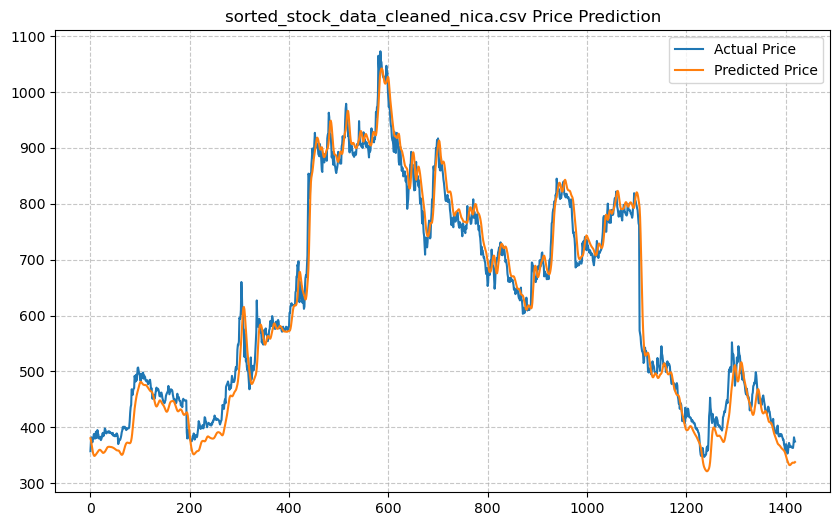

In [18]:
# import matplotlib.pyplot as plt

# Visualization
plt.figure(figsize=(10, 6))
plt.plot(y_test_actual, label='Actual Price')
plt.plot(y_pred, label='Predicted Price')
plt.legend()
plt.title(f'{stock} Price Prediction')
plt.grid(True, linestyle='--', alpha=0.7)  # Dashed grid lines with transparency
plt.savefig(f"{stock}.png")
plt.show()


In [19]:
# For the reversing of the data
# import pandas as pd

# # Load the CSV file
# df = pd.read_csv("cleaned_file.csv")

# # Reverse the order of rows
# df = df[::-1].reset_index(drop=True)

# # Save the modified CSV
# df.to_csv("sorted_stock_data_cleaned_nica.csv", index=False)
